# Text Classification Assignment
## By Charith Muppidi and Harshith Nanda

In [138]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models,Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.data.experimental import make_csv_dataset
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout
from nltk.tokenize import word_tokenize
import numpy as np
np.random.seed(1234)
import pandas as pd
from sklearn.metrics import classification_report
from statistics import mean
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/email-classification-nlp/SMS_train.csv
/kaggle/input/email-classification-nlp/SMS_test.csv


In [139]:
train = pd.read_csv("/kaggle/input/email-classification-nlp/SMS_train.csv", encoding='ISO-8859-1')
test = pd.read_csv("/kaggle/input/email-classification-nlp/SMS_test.csv", encoding='ISO-8859-1')

<AxesSubplot:>

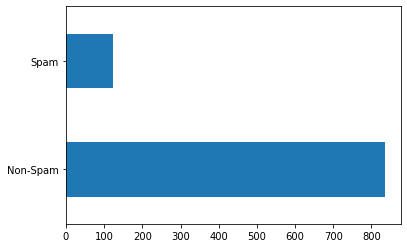

In [150]:
train.Label.value_counts().plot(kind = 'barh')

<AxesSubplot:>

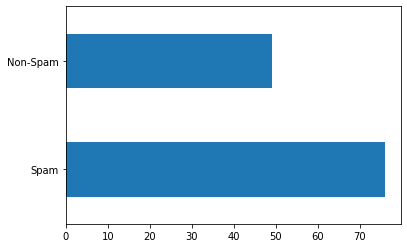

In [151]:
test.Label.value_counts().plot(kind = 'barh')

In [140]:
train_features = train['Message_body']
train_labels = train['Label']
test_features = test['Message_body']
test_labels = test['Label']

In [141]:
String = " ".join(train_features)
x = word_tokenize(String)
temp = set(x)
print(len(x))

17441


In [142]:
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_features)
X_train = tokenizer.texts_to_matrix(train_features, mode='tfidf')
X_test = tokenizer.texts_to_matrix(test_features, mode='tfidf')
encoder = LabelEncoder()
encoder.fit(train_labels)
Y_train = encoder.transform(train_labels)
Y_test = encoder.transform(test_labels)

This dataset contains bodies of emails sent to a receipient, and labels to signify if they are spam or not. The model is suppose to analyze email headings and them clessify them as either spam or non-spam. The maker of this dataset gave us a challenge by having spam be the predominant label in the training set and the non-spam label being more occurant in the testing set.

## Sequential

In [143]:
model1 = Sequential()
model1.add(layers.Dense(16, input_dim=25000, kernel_initializer='normal', activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1,activation='relu'))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(X_train,Y_train,batch_size=128,epochs=15,verbose=1,validation_split=0.1)

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 0.1272 - accuracy: 0.8711 - val_loss: 0.1148 - val_accuracy: 0.8854
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1171 - accuracy: 0.8757 - val_loss: 0.1107 - val_accuracy: 0.8854
Epoch 3/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0975 - accuracy: 0.8885 - val_loss: 0.0898 - val_accuracy: 0.8958
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0685 - accuracy: 0.9175 - val_loss: 0.0750 - val_accuracy: 0.9271
Epoch 5/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0411 - accuracy: 0.9535 - val_loss: 0.0613 - val_accuracy: 0.9479
Epoch 6/15
7/7 [==============================] - 0s 11ms/step - loss: 0.0241 - accuracy: 0.9756 - val_loss: 0.0543 - val_accuracy: 0.9479
Epoch 7/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0154 - accuracy: 0.9814 - val_loss: 0.0539 - val_accuracy: 0.9479
Epoch 8/15
7/7 [===========

In [144]:
pred = model1.predict(X_test)
pred_labels = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(Y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.55      0.98      0.70        49
           1       0.97      0.47      0.64        76

    accuracy                           0.67       125
   macro avg       0.76      0.73      0.67       125
weighted avg       0.81      0.67      0.66       125



## GRU

In [145]:
model2 = Sequential()
model2.add(layers.Embedding(1675, 32))
model2.add(layers.GRU(32))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='relu'))
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X_train,Y_train,batch_size=32,epochs=2,verbose=1,validation_split=0.1)

Epoch 1/2
27/27 [==============================] - 73s 594ms/step - loss: 0.1289 - accuracy: 0.8711 - val_loss: 0.1146 - val_accuracy: 0.8854
Epoch 2/2
27/27 [==============================] - 15s 561ms/step - loss: 0.1224 - accuracy: 0.8711 - val_loss: 0.1034 - val_accuracy: 0.8854


In [153]:
pred2 = model2.predict(X_test)
pred_labels2 = [1.0 if p2>= 0.5 else 0.0 for p2 in pred2]
print(classification_report(Y_test, pred_labels2))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        49
           1       0.00      0.00      0.00        76

    accuracy                           0.39       125
   macro avg       0.20      0.50      0.28       125
weighted avg       0.15      0.39      0.22       125



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Embeddings

In [147]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedding_layer = layers.Embedding(1675, 128)
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(1000, activation="softmax")(x)
model3 = keras.Model(int_sequences_input, preds)
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
model3.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 7s 750ms/step - loss: 6.5900 - acc: 0.6385
Epoch 2/10
8/8 [==============================] - 6s 742ms/step - loss: 2.3140 - acc: 0.8704
Epoch 3/10
8/8 [==============================] - 6s 742ms/step - loss: 1.1034 - acc: 0.8088
Epoch 4/10
8/8 [==============================] - 6s 737ms/step - loss: 0.7227 - acc: 0.7743
Epoch 5/10
8/8 [==============================] - 6s 730ms/step - loss: 0.4831 - acc: 0.8568
Epoch 6/10
8/8 [==============================] - 6s 729ms/step - loss: 0.4627 - acc: 0.8433
Epoch 7/10
8/8 [==============================] - 6s 727ms/step - loss: 0.4381 - acc: 0.8704
Epoch 8/10
8/8 [==============================] - 6s 728ms/step - loss: 0.4224 - acc: 0.8725
Epoch 9/10
8/8 [==============================] - 6s 727ms/step - loss: 0.4308 - acc: 0.8715
Epoch 10/10
8/8 [==============================] - 6s 730ms/step - loss: 0.4073 - acc: 0.8725


In [154]:
pred3 = model3.predict(X_test)
pred_labels3 = [1.0 if mean(p3)>= 0.5 else 0.0 for p3 in pred3]
print(classification_report(Y_test, pred_labels3))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        49
           1       0.00      0.00      0.00        76

    accuracy                           0.39       125
   macro avg       0.20      0.50      0.28       125
weighted avg       0.15      0.39      0.22       125



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Surprisingly, the sequential model on its own outperformed itself when not using GRU and embeddings. It managed to get a better accuracy on the training and testing sets. We believe that the lack of proportionality between the amount of spam and non-spam emails may have caused overfitting when using GRU and/or embeddings. Because of how simple it is to use a sequential model on its own, it was able to bet fit this dataset. 